<a href="https://colab.research.google.com/github/baeksumin/k-project/blob/main/modeling_lstm_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torch.optim as optim
from google.colab import drive
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/[Shared]K-Project/data/mktcap_top10/KR7006840003.csv')

In [4]:
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,2021/12/30,0,0,0,0,0,NaN
1,2021/12/29,0,0,0,0,0,NaN
2,2021/12/28,0,0,0,0,0,NaN
3,2021/12/27,0,0,0,0,0,NaN
4,2021/12/24,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...
5525,1999/08/17,0,0,1,0,0,NaN
5526,1999/08/16,0,0,1,1,0,NaN
5527,1999/08/13,0,0,1,1,0,NaN
5528,1999/08/12,0,0,1,1,0,NaN


In [5]:
data[data['MAP_sig'] == -1]

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
234,2021/01/21,0,0,-1,-1,0,0.183673
267,2020/12/02,0,0,1,-1,0,-0.555556
268,2020/12/01,0,0,1,-1,0,-0.777778
269,2020/11/30,0,0,1,-1,0,-1.000000
430,2020/04/06,0,0,1,-1,0,-0.100000
431,2020/04/03,0,0,1,-1,0,-0.250000
439,2020/03/24,0,-1,1,-1,0,-0.750000
440,2020/03/23,0,-1,1,-1,-1,-0.800000
442,2020/03/19,0,-1,1,-1,0,-1.000000
1380,2016/05/24,0,0,-1,-1,0,0.250000


In [6]:
data['TREND'].isnull().sum()

24

In [7]:
data['TREND'] = data['TREND'].fillna(0)

In [8]:
data.isnull().sum()

TRD_DD     0
GDC_sig    0
RSI_sig    0
ROC_sig    0
MAP_sig    0
STC_sig    0
TREND      0
dtype: int64

In [9]:
data[0.1 < data['TREND']]

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
17,2021/12/07,0,0,0,0,0,1.000000
18,2021/12/06,0,0,0,0,0,0.714286
58,2021/10/08,0,0,0,0,0,0.164835
59,2021/10/07,0,0,0,0,0,0.186813
60,2021/10/06,0,0,0,0,0,0.208791
...,...,...,...,...,...,...,...
5508,1999/09/09,0,0,-1,0,0,0.555556
5509,1999/09/08,0,0,-1,0,0,0.444444
5510,1999/09/07,0,0,-1,0,0,0.333333
5511,1999/09/06,0,0,-1,0,0,0.222222


In [10]:
#최신 데이터가 뒤로 오도록 정렬
data = data.sort_values(by=['TRD_DD'])
data.set_index('TRD_DD',drop=True,inplace=True)
data.reset_index('TRD_DD',drop=False,inplace=True)
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,1999/08/11,0,0,-1,1,0,0.0
1,1999/08/12,0,0,1,1,0,0.0
2,1999/08/13,0,0,1,1,0,0.0
3,1999/08/16,0,0,1,1,0,0.0
4,1999/08/17,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...
5525,2021/12/24,0,0,0,0,0,0.0
5526,2021/12/27,0,0,0,0,0,0.0
5527,2021/12/28,0,0,0,0,0,0.0
5528,2021/12/29,0,0,0,0,0,0.0


In [11]:
Y_colname = ['TREND'] #종속변수
X_remove = ['TRD_DD']
X_colname = [x for x in data.columns if x not in Y_colname + X_remove] #입력변수들
X_colname

['GDC_sig', 'RSI_sig', 'ROC_sig', 'MAP_sig', 'STC_sig']

In [12]:
def datasplit(df, Y_colname, X_colname): #데이터 분리 함수
  df_train = df.loc[0 : round(len(df) * 0.75)] 
  df_test = df.loc[round(len(df) * 0.75) + 1 : ]
  Y_train = df_train[Y_colname]
  X_train = df_train[X_colname]
  Y_test = df_test[Y_colname]
  X_test = df_test[X_colname]
  return X_train, X_test, Y_train, Y_test

In [13]:
X_train, X_test, Y_train, Y_test = datasplit(data, Y_colname, X_colname)

In [14]:
print('X_train :', X_train.shape, 'Y_train :', Y_train.shape) 
print('X_test :', X_test.shape, 'Y_test :', Y_test.shape)

X_train : (4149, 5) Y_train : (4149, 1)
X_test : (1381, 5) Y_test : (1381, 1)


In [15]:
Y_train

,TREND
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
4144,-0.333333
4145,-0.250000
4146,-0.166667
4147,-0.083333


In [16]:
#array로 변환
X_train_arr = X_train.values
Y_train_arr = Y_train.values
X_test_arr = X_test.values
Y_test_arr = Y_test.values

In [17]:
seq_length = 35 #몇개의 입력데이터로 차분 데이터 생성할지에 대한 파라미터. 지금은 12라고 가정. 나중에 반복문을 통해 sequence 최적화가 필요할듯.
X_train, Y_train = [], []
for index in range(len(X_train_arr) - seq_length): #sequence개의 데이터만큼 차분데이터 분석에 사용하므로, 총 데이터 개수 - sequence개수가 전체 데이터의 길이 --> 총길이만큼 돌리는 것이므로, 기존 차원을 뜻하는 (row, column) 꼴에는 변함 없음 --> 2차원 데이터
  X_train.append(np.array(X_train_arr[index:index + seq_length])) #X_train 데이터 --> index가 sequence인 1차원 데이터 생성 --> sequence를 뜻하는 차원 생성
  Y_train.append(np.ravel(Y_train_arr[index + seq_length:index + seq_length + 1])) #Y_train 데이터 --> index가 sequence인 1차원 데이터 생성 --> 그러나 ravel() 로 차원축소 --> sequence차원 생성되지 않음.
X_train, Y_train = np.array(X_train), np.array(Y_train) #array로 저장되어있는 리스트를 array로 변환해서 저장

In [18]:
X_test, Y_test = [], [] #동일한 과정 test데이터셋에도 적용
for index in range(len(X_test_arr) - seq_length):
  X_test.append(np.array(X_test_arr[index:index + seq_length])) 
  Y_test.append(np.ravel(Y_test_arr[index + seq_length:index + seq_length + 1]))
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [19]:
print('X_train :', X_train.shape, 'Y_train :', Y_train.shape) #X/Y 분리가 잘 됨. 데이터 전처리 과정 완료
print('X_test :', X_test.shape, 'Y_test :', Y_test.shape)

X_train : (4114, 35, 5) Y_train : (4114, 1)
X_test : (1346, 35, 5) Y_test : (1346, 1)


# 모델링

In [20]:
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from keras.layers import LSTM, SimpleRNN, GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import matplotlib.pyplot as plt

In [22]:
batch_size = 25 #미니 배치 내 데이터 수
epoch = 80 #돌릴 횟수

In [23]:
model = Sequential()
model.add(Conv1D(32, 5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))  #은닉층 노드 수, 커널 크기(window -> 패턴 추출을 위해 7일 -2일(휴일) 즉, 일주일의 패턴을 습득, 돌아보겠다.)
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 31, 32)            832       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 32)             5152      
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 12,353
Trainable params: 12,353
Non-trainable params: 0
____________________________________________________

In [24]:
model_fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, verbose=1) #모델 피팅

Epoch 1/80
165/165 [==============================] - 5s 9ms/step - loss: 0.3116
Epoch 2/80
165/165 [==============================] - 1s 9ms/step - loss: 0.2892
Epoch 3/80
165/165 [==============================] - 1s 9ms/step - loss: 0.2735
Epoch 4/80
165/165 [==============================] - 1s 9ms/step - loss: 0.2614
Epoch 5/80
165/165 [==============================] - 1s 8ms/step - loss: 0.2431
Epoch 6/80
165/165 [==============================] - 1s 9ms/step - loss: 0.2292
Epoch 7/80
165/165 [==============================] - 1s 9ms/step - loss: 0.2094
Epoch 8/80
165/165 [==============================] - 1s 9ms/step - loss: 0.1953
Epoch 9/80
165/165 [==============================] - 1s 8ms/step - loss: 0.1828
Epoch 10/80
165/165 [==============================] - 2s 10ms/step - loss: 0.1734
Epoch 11/80
165/165 [==============================] - 2s 9ms/step - loss: 0.1644
Epoch 12/80
165/165 [==============================] - 1s 9ms/step - loss: 0.1550
Epoch 13/80
165/165 [===

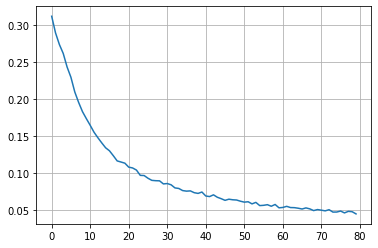

In [25]:
plt.plot(pd.DataFrame(model_fit.history)) #모델 피팅 결과 시각화
plt.grid(True)
plt.show()

In [33]:
Y_train_pred = model.predict(X_train) #예측 데이터 생성
Y_test_pred = model.predict(X_test)

In [42]:
score_table = pd.DataFrame(Y_test, columns=['real'])
score_table['pred'] = Y_test_pred
score_table

,real,pred
0,1.000,0.631659
1,0.875,0.686157
2,0.750,0.779631
3,0.375,0.663733
4,0.250,0.592096
...,...,...
1341,0.000,0.343157
1342,0.000,0.297317
1343,0.000,0.443786
1344,0.000,0.527897


In [51]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(score_table['real'], score_table['pred'])
RMSE = np.sqrt(MSE)

In [52]:
print("MSE : {0}, RMSE : {1}".format(MSE, RMSE))

MSE : 0.4621496838557176, RMSE : 0.6798159190955428


#모델 결과 시각화 및 평가

In [43]:
def evaluation(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                           xlim=(Y_real.index.min(),Y_real.index.max()),
                                                                                                           linewidth=3, fontsize=20)
        plt.title('Upper: Training Set, Lower: Test Set', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    return Score, Residual

In [44]:
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te

43/43 [==============================] - 0s 3ms/step - loss: 9.3029e-16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


,MAE,MSE,MAPE
Train,0.131318,0.033162,inf
Test,0.556064,0.462150,inf


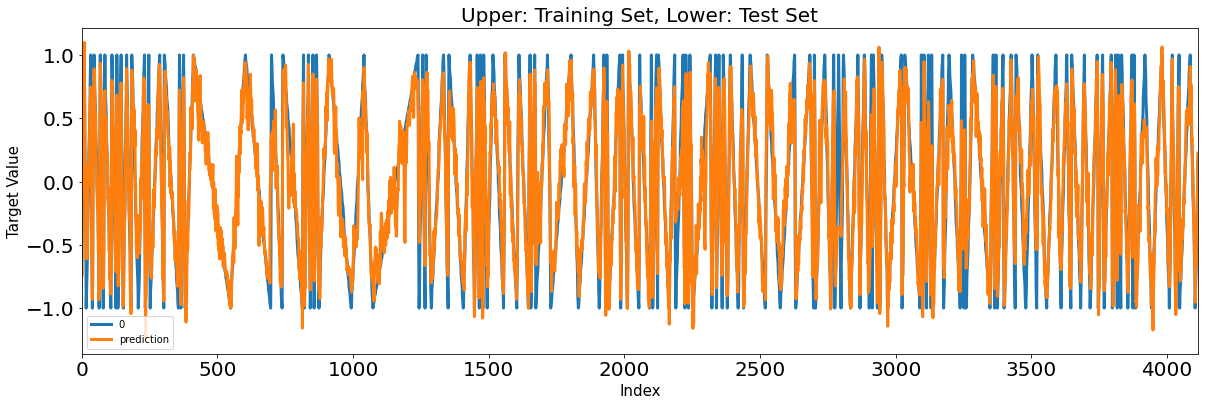

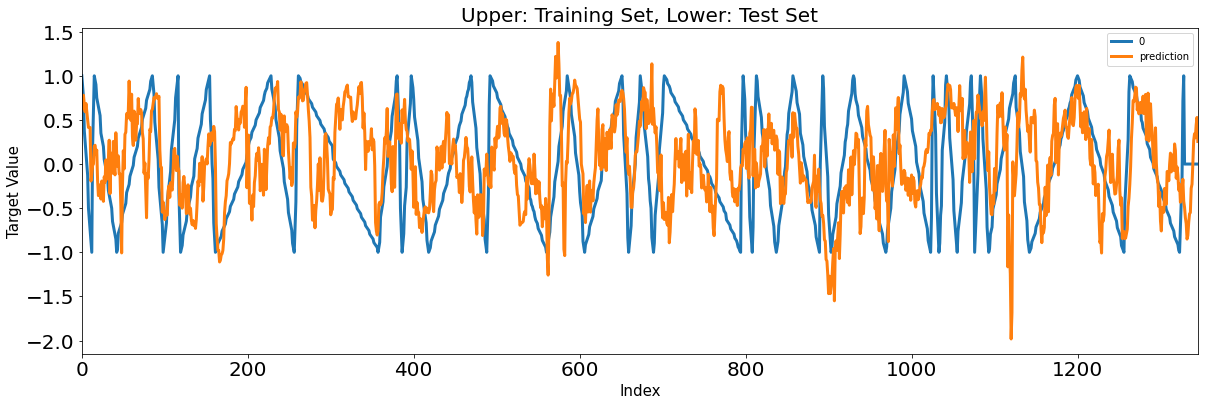

In [45]:
result = model.evaluate(X_test, Y_test_pred)
Score_GRU, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_GRU)

# 하이퍼 파라미터 최적화

batch_size 최적화

In [66]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [54]:
def build_model(optimizer): #모델 생성 함수
    model = Sequential()
    model.add(Conv1D(32, 5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))) 
    model.add(MaxPooling1D(3))
    model.add(Conv1D(32, 5, activation='relu'))
    model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics=['accuracy'])
    return model

In [57]:
model = KerasClassifier(build_fn = build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [64]:
parameters = {'batch_size': [20, 50],
              'epochs': [80, 100],
              'optimizer': ['adam', 'rmsprop']}

In [68]:
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

In [70]:
grid_search = grid_search.fit(X_train, Y_train)

ValueError: ignored

# 실제 미래 예측을 위한 데이터 준비

In [ ]:
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,1999/08/11,0,0,-1,1,0,0.0
1,1999/08/12,0,0,1,1,0,0.0
2,1999/08/13,0,0,1,1,0,0.0
3,1999/08/16,0,0,1,1,0,0.0
4,1999/08/17,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...
5525,2021/12/24,0,0,0,0,0,0.0
5526,2021/12/27,0,0,0,0,0,0.0
5527,2021/12/28,0,0,0,0,0,0.0
5528,2021/12/29,0,0,0,0,0,0.0


In [ ]:
X_data = data[X_colname]
Y_data = data[Y_colname]

In [ ]:
X_data_arr = X_data.values
Y_data_arr = Y_data.values

In [ ]:
X_data, Y_data = [], [] 
for index in range(len(X_data_arr) - seq_length):
  X_data.append(np.array(X_data_arr[index:index + seq_length])) 
  Y_data.append(np.ravel(Y_data_arr[index + seq_length:index + seq_length + 1]))
X_data, Y_data = np.array(X_data), np.array(Y_data)

In [ ]:
print('X_data :', X_data.shape, 'Y_data :', Y_data.shape)

X_data : (5495, 35, 5) Y_data : (5495, 1)


In [ ]:
X_data = torch.tensor(X_data, dtype=torch.float32)
Y_data = torch.tensor(Y_data, dtype=torch.float32)

# 실제 미래 예측